<a href="https://colab.research.google.com/github/patrycjapiechowicz/Projects/blob/DataWorkshop/modul1__adult_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Adult Dataset](https://bit.ly/3rvRB8j)

### Celem jest zrobić predykcję, czy dana osoba osiągnie przychód ponad 50 tysięcy (dolarów) w rok.

In [5]:
import pandas as pd
import numpy as np

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

#models
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [6]:
train=pd.read_hdf('/content/drive/MyDrive/module1/input/train.adult.h5')

In [ ]:
train.info()

In [ ]:
train.describe(include='all')

In [9]:
train.corr()

,Age,fnlwgt,Education-Num,Sex,Capital Gain,Capital Loss,Hours per week
Age,1.000000,-0.076646,0.036527,0.088832,0.064301,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.026858,-0.007000,-0.010252,-0.018768
Education-Num,0.036527,-0.043195,1.000000,0.012280,0.062300,0.079923,0.148123
Sex,0.088832,0.026858,0.012280,1.000000,0.028219,0.045567,0.229309
Capital Gain,0.064301,-0.007000,0.062300,0.028219,1.000000,-0.027282,0.031964
Capital Loss,0.057775,-0.010252,0.079923,0.045567,-0.027282,1.000000,0.054256
Hours per week,0.068756,-0.018768,0.148123,0.229309,0.031964,0.054256,1.000000


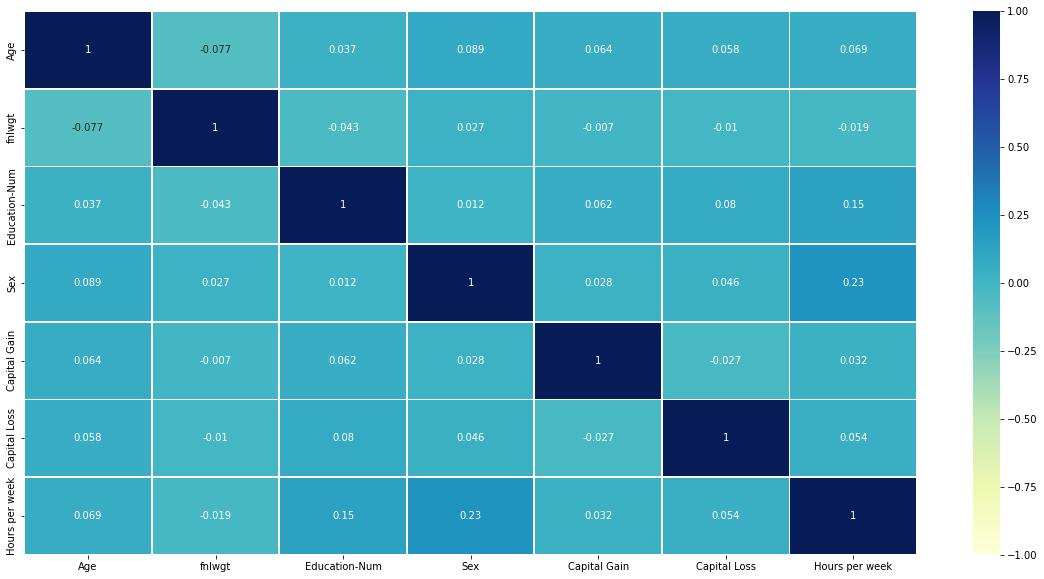

In [10]:
plt.rcParams['figure.figsize']=(20,10)
sns.heatmap(train.corr(), vmax=1., vmin=-1., annot=True, linewidths=.8, cmap="YlGnBu");

In [11]:
train['Age'].unique()

array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87], dtype=int8)

In [12]:
train['Sex'].value_counts()

True     21790
False    10771
Name: Sex, dtype: int64

In [13]:
train['Target'].value_counts()

<=50K    24720
>50K      7841
Name: Target, dtype: int64

In [14]:
train.sample(10)

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
28788,45,Private,184277,Assoc-voc,11,Divorced,Adm-clerical,Unmarried,White,False,0,0,55,United-States,>50K
24918,31,Federal-gov,113688,HS-grad,9,Never-married,Machine-op-inspct,Unmarried,White,False,0,0,40,United-States,<=50K
9920,47,Self-emp-not-inc,112200,Bachelors,13,Never-married,Exec-managerial,Not-in-family,Black,True,10520,0,45,United-States,>50K
11594,33,Private,92865,Some-college,10,Never-married,Adm-clerical,Own-child,White,False,0,0,40,United-States,<=50K
10741,26,Private,36936,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,White,True,0,2002,40,United-States,<=50K
19468,17,Private,206506,10th,6,Never-married,Handlers-cleaners,Other-relative,White,True,0,0,10,El-Salvador,<=50K
12400,34,Private,296724,Some-college,10,Never-married,Exec-managerial,Not-in-family,White,False,0,0,17,United-States,<=50K
12383,45,Private,199058,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,True,7298,0,50,United-States,>50K
13519,49,Private,151107,HS-grad,9,Never-married,Craft-repair,Not-in-family,Black,True,0,0,40,United-States,<=50K
21519,22,Private,39432,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,True,0,0,40,United-States,<=50K


In [15]:
train.isnull().sum()

Age                  0
Workclass         1836
fnlwgt               0
Education            0
Education-Num        0
Martial Status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital Gain         0
Capital Loss         0
Hours per week       0
Country            583
Target               0
dtype: int64

In [16]:
def check_missing():
    for column in train.columns:
        missing = column, train[column].isnull().sum()
        if missing[1] == 0: continue

        print(missing)
        
check_missing()

('Workclass', 1836)
('Occupation', 1843)
('Country', 583)


In [17]:
train = train.fillna(-1)

In [18]:
check_missing()

In [19]:
train['target_cat'] = (train['Target'] != '<=50K').astype('int8')

X = train[ ['Age'] ].values 
y = train[ 'target_cat' ].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print("Train:", X_train.shape, y_train.shape)
print("Test:", X_test.shape, y_test.shape)

Train: (22792, 1) (22792,)
Test: (9769, 1) (9769,)


In [20]:
model = LogisticRegression()

model.fit(X_train, y_train)    #podajemy X_train, y_train
y_pred = model.predict(X_test) #sprawdzamy na X_test

print(accuracy_score(y_test, y_pred))

0.745112089261951


In [21]:
def train_and_predict(model, X, y, test_size=0.33):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2018)
    
    model.fit(X_train, y_train)    
    y_pred = model.predict(X_test) 

    return accuracy_score(y_test, y_pred)

In [22]:
train_and_predict(DummyClassifier(), X, y, test_size=0.33)

0.7620022520217014

In [23]:
train_and_predict(LogisticRegression(), X, y, test_size=0.33)

0.745112089261951

In [ ]:
train_and_predict(LogisticRegression(), X, y, test_size=0.33)

0.745112089261951

In [ ]:
train['Race'].unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
       'Other'], dtype=object)

In [24]:
pd.get_dummies( train['Race'], drop_first=True ).head()

,Asian-Pac-Islander,Black,Other,White
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,1,0,0
4,0,1,0,0


In [26]:
pd.factorize( train['Workclass'] )[0]

array([0, 1, 2, ..., 2, 2, 6])

In [28]:
train.Workclass.unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', -1, 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [29]:
train.Workclass = train.Workclass.map(lambda x: str(x))

le = LabelEncoder()
le.fit(train['Workclass'])
le.transform(train['Workclass'])

array([7, 6, 4, ..., 4, 4, 5])

In [30]:
train.select_dtypes(include=[np.object]).columns

<ipython-input-30-029764886d1c>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  train.select_dtypes(include=[np.object]).columns


Index(['Workclass', 'Education', 'Martial Status', 'Occupation',
       'Relationship', 'Race', 'Country', 'Target'],
      dtype='object')

In [31]:
cat_feats = train.select_dtypes(include=[np.object]).columns

for cat_feat in cat_feats:
    train['{0}_cat'.format(cat_feat)] = pd.factorize( train[cat_feat] )[0]

<ipython-input-31-6b33b4c01d34>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cat_feats = train.select_dtypes(include=[np.object]).columns


In [32]:
cat_feats

Index(['Workclass', 'Education', 'Martial Status', 'Occupation',
       'Relationship', 'Race', 'Country', 'Target'],
      dtype='object')

In [33]:
feats = train.select_dtypes(include=[np.int]).columns.values
feats

<ipython-input-33-5bf5c3db34c8>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  feats = train.select_dtypes(include=[np.int]).columns.values


array(['fnlwgt', 'Education-Num', 'Workclass_cat', 'Education_cat',
       'Martial Status_cat', 'Occupation_cat', 'Relationship_cat',
       'Race_cat', 'Country_cat', 'Target_cat'], dtype=object)

In [34]:
feats = feats[:-1] 
feats

array(['fnlwgt', 'Education-Num', 'Workclass_cat', 'Education_cat',
       'Martial Status_cat', 'Occupation_cat', 'Relationship_cat',
       'Race_cat', 'Country_cat'], dtype=object)

In [35]:
X = train[ feats ].values
y = train['Target_cat'].values

In [36]:
train_and_predict(LogisticRegression(), X, y, test_size=0.33) ### zamiast trzech kropek - podaj model (np. LogisticRegression())

0.7620022520217014

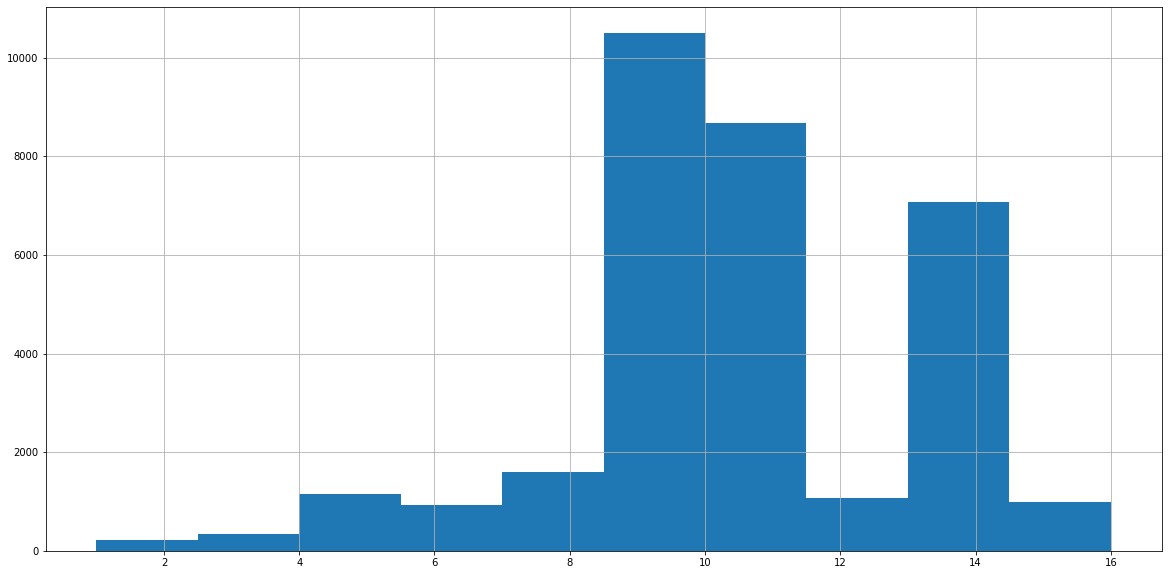

In [37]:
train['Education-Num'].hist();

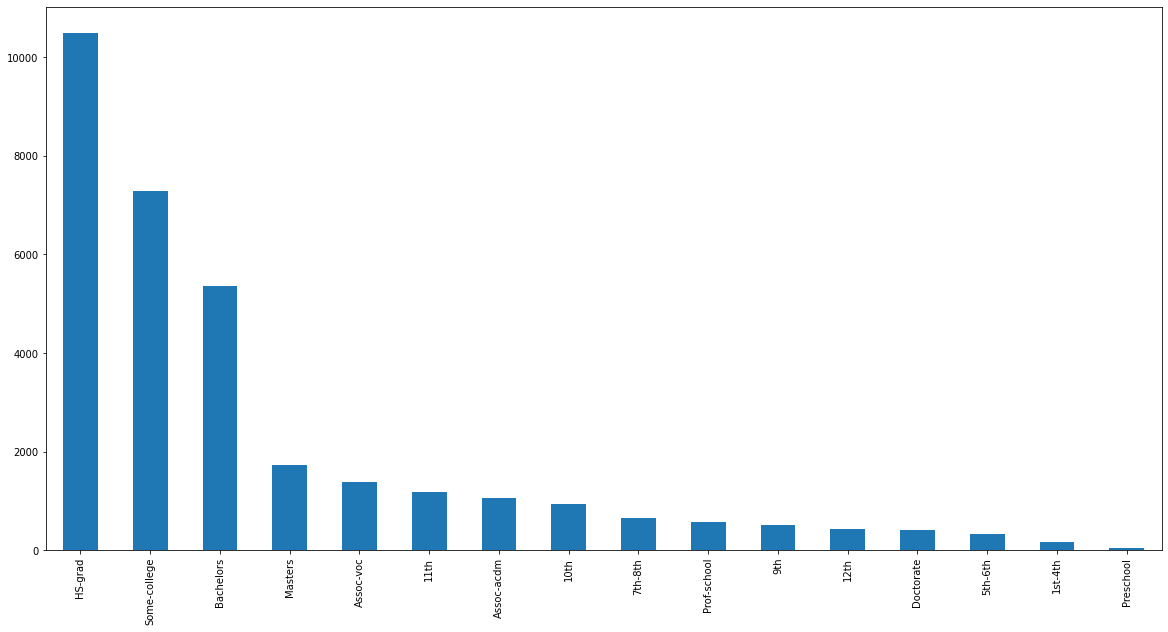

In [38]:
train['Education'].value_counts().plot(kind='bar');

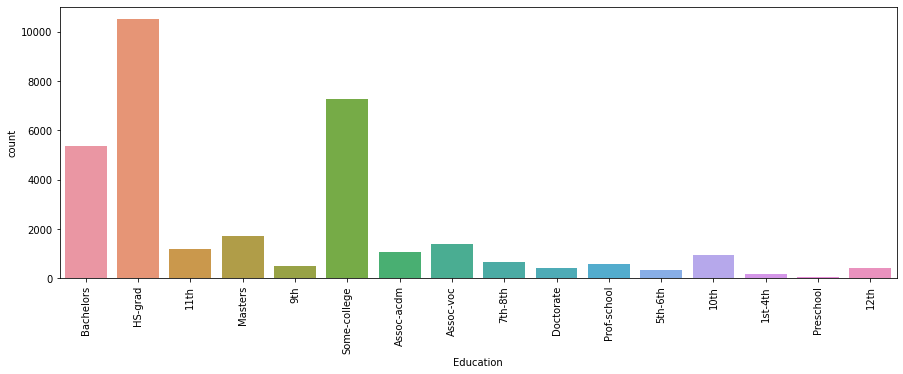

In [39]:
plt.figure(figsize=(15, 5))
sns.countplot(x='Education', data=train);
plt.xticks(rotation=90);

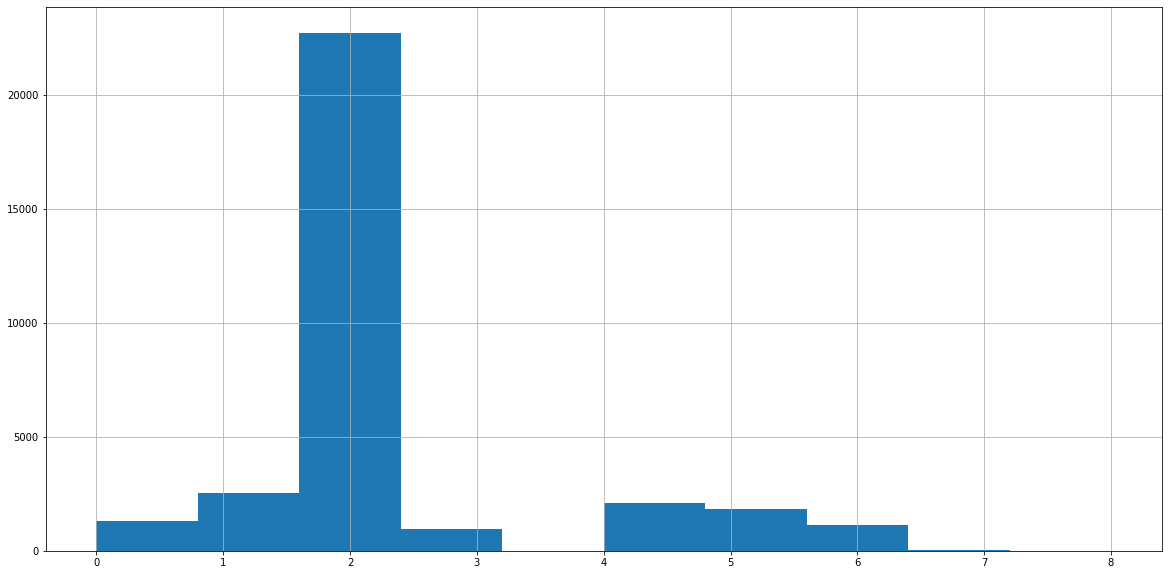

In [40]:
train['Workclass_cat'].hist();

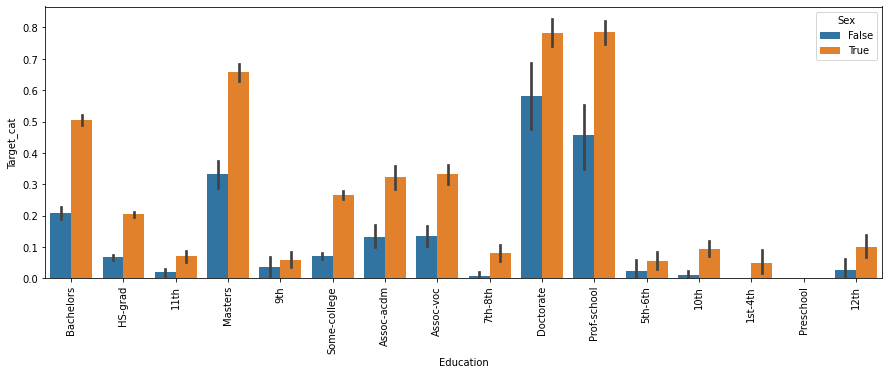

In [41]:
plt.figure(figsize=(15, 5))
sns.barplot(x="Education", y="Target_cat",  hue='Sex',data=train)
plt.xticks(rotation=90);

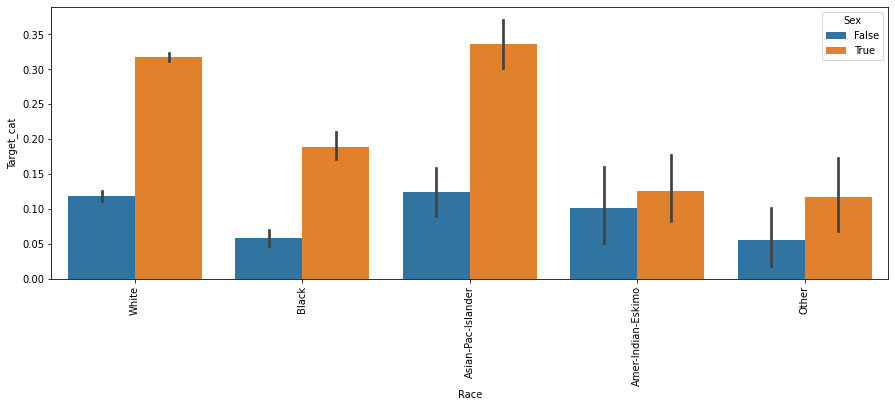

In [42]:
plt.figure(figsize=(15, 5))
sns.barplot(x="Race", y="Target_cat", hue='Sex', data=train)
plt.xticks(rotation=90);

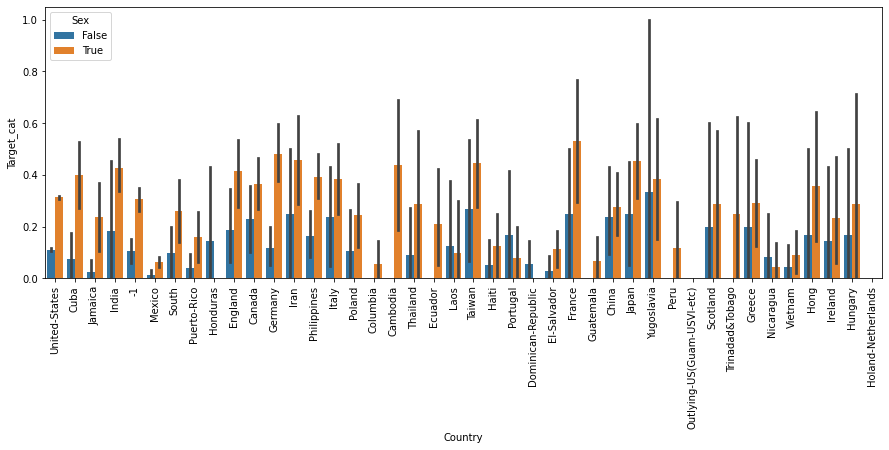

In [43]:
plt.figure(figsize=(15, 5))
sns.barplot(x="Country", y="Target_cat", hue='Sex', data=train)
plt.xticks(rotation=90);

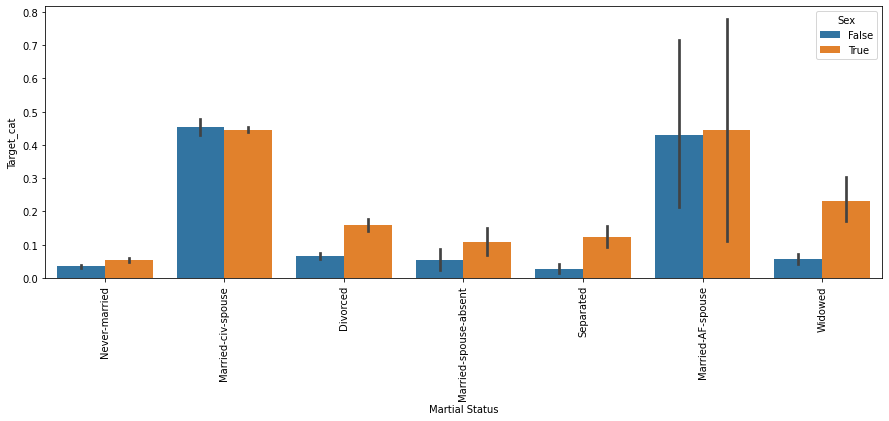

In [44]:
plt.figure(figsize=(15, 5))
sns.barplot(x='Martial Status', y="Target_cat", hue='Sex', data=train)
plt.xticks(rotation=90);

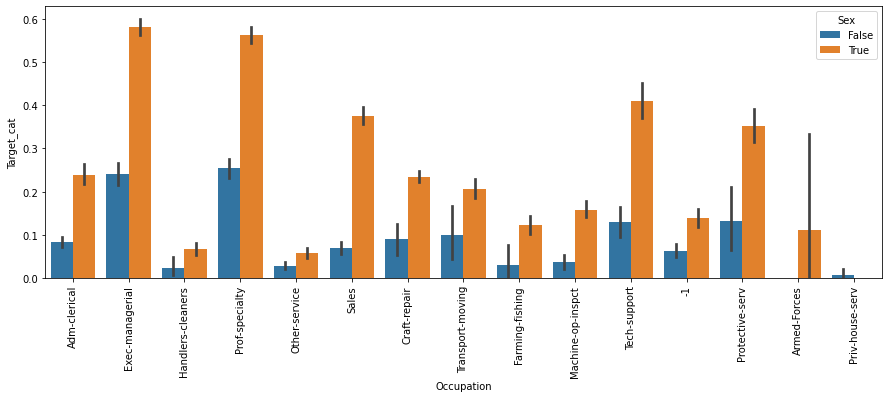

In [45]:
plt.figure(figsize=(15, 5))
sns.barplot(x='Occupation', y="Target_cat", hue='Sex', data=train)
plt.xticks(rotation=90);

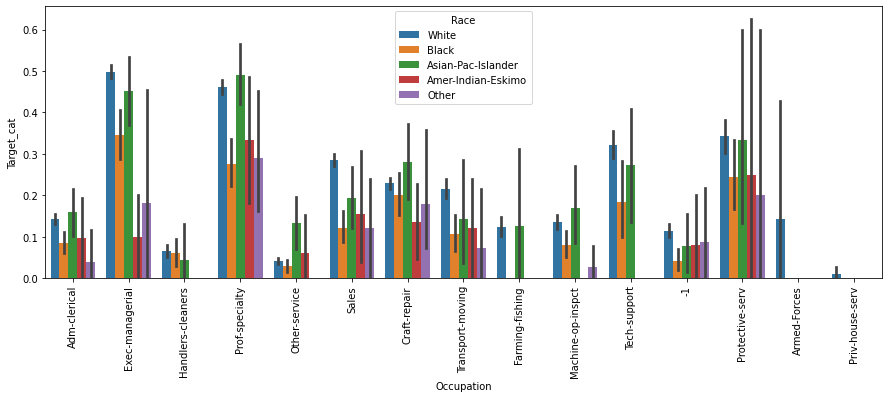

In [46]:
plt.figure(figsize=(15, 5))
sns.barplot(x='Occupation', y="Target_cat", hue='Race', data=train)
plt.xticks(rotation=90);

<Figure size 1440x360 with 0 Axes>

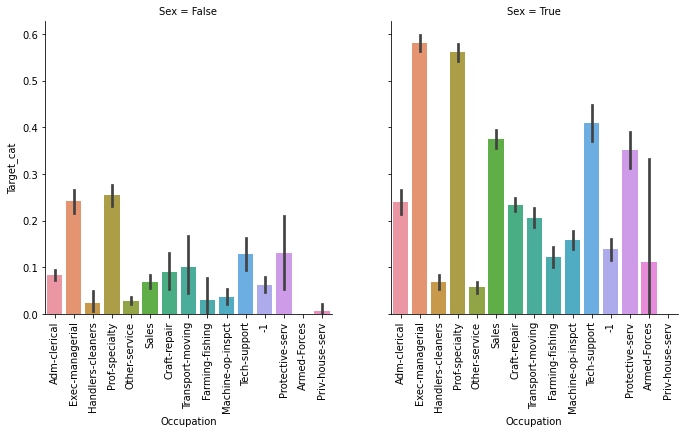

In [47]:
plt.figure(figsize=(20, 5))
g = sns.catplot(x="Occupation", y="Target_cat", col="Sex", data=train, kind="bar")

for ax in g.axes.flatten():
    plt.sca(ax)
    plt.xticks(rotation=90)

<Figure size 1440x360 with 0 Axes>

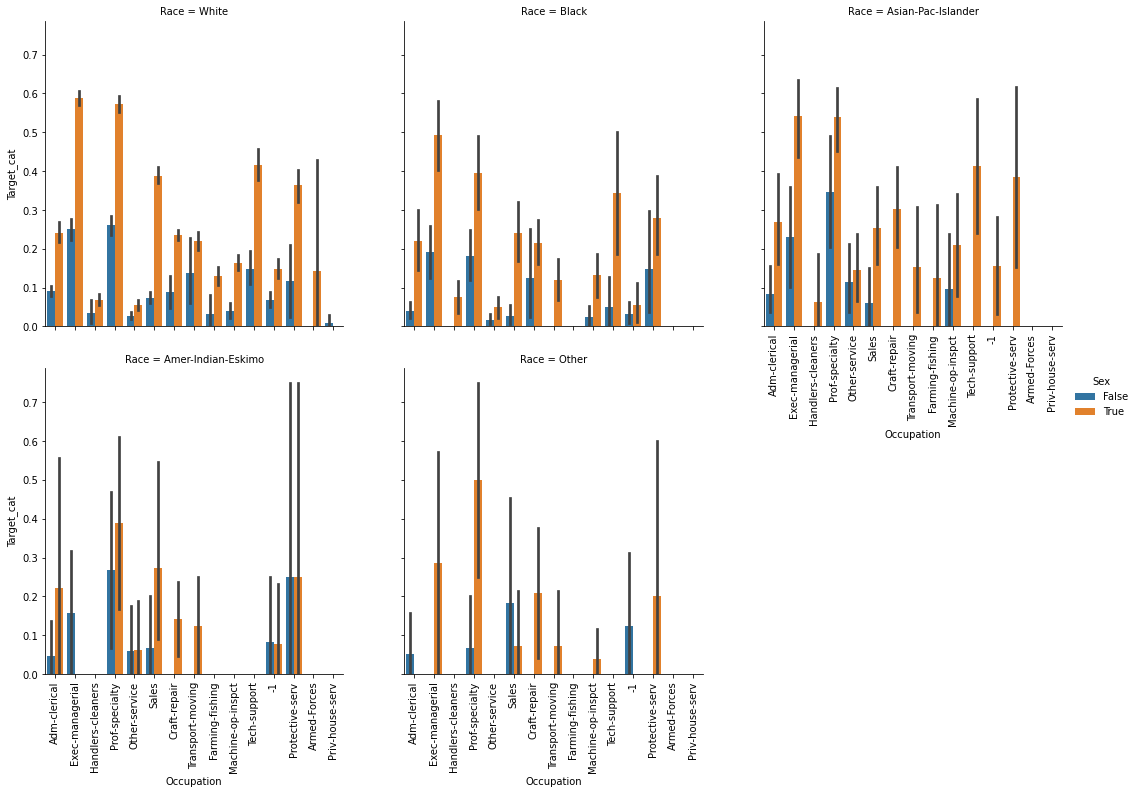

In [48]:
plt.figure(figsize=(20, 5))
g = sns.catplot(x="Occupation", y="Target_cat", hue="Sex", col='Race', col_wrap=3, data=train, kind="bar")

for ax in g.axes.flatten():
    plt.sca(ax)
    plt.xticks(rotation=90)